In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
inputs= np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
target_outputs = np.array([[0],[1],[1],[0]])

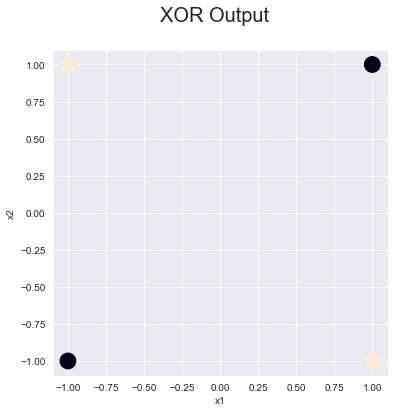

In [9]:
#Plotting the XOR problem
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(inputs[:,0], inputs[:,1],s=250, c=(target_outputs))
ax.set(xlabel='x1', ylabel='x2')
fig.suptitle('XOR Output', size=20);

In [10]:
#Neural constructed after consulting the following resources
# [1] https://medium.com/analytics-vidhya/coding-a-neural-network-for-xor-logic-classifier-from-scratch-b90543648e8a
# [2] https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7
# [3] https://dev.to/jbahire/demystifying-the-xor-problem-1blk

class neural_net:
    def __init__(self, train, target, lr, epochs):
        self.train = train
        self.target = target
        self.lr = lr
        self.epochs = epochs
        self.losses = []
        
        self.W1 = np.random.uniform(size=(2, 2)) # Weight matrix for hidden layer
        self.W2 = np.random.uniform(size=(2, 1)) # Weight matrix for output layer
        self.b1 = np.random.uniform(size=(1,2))
        self.b2 = np.random.uniform(size=(1, 1))
        
        #Training neural net
        for epoch in range(epochs):
            self.forward(self.train)
            loss = self.back_prop()
            if loss.all() == 0:
                break
        
    def forward(self, batch):
        self.hidden = np.dot(batch, self.W1) + self.b1
        self.hidden_output = self.sigmoid(self.hidden)
        self.output = np.dot(self.hidden_output, self.W2) + self.b2
        self.final_output = self.sigmoid(self.output)

        return self.final_output
    
    def hidden_output(self, batch):
        self.hidden = np.dot(batch, self.W1) + self.b1
        return self.sigmoid(self.hidden)
    
    def back_prop(self):
        loss = 0.5 * (self.target - self.final_output) ** 2
        self.losses.append(np.sum(loss))
        error_term = (self.target - self.final_output)
        self.W1 += self.lr * self.train.T @ (((error_term * self.derivative_sigmoid(self.final_output)) * self.W2.T) * self.derivative_sigmoid(self.hidden_output))
        self.W2 += self.lr *  self.hidden_output.T @ (error_term * self.derivative_sigmoid(self.final_output))
        self.b1 += np.sum(self.lr * ((error_term * self.derivative_sigmoid(self.final_output)) * self.W2.T) * self.derivative_sigmoid(self.hidden_output), axis=0)
        self.b2 += np.sum(self.lr * error_term * self.derivative_sigmoid(self.final_output), axis=0)
        return loss
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def derivative_sigmoid(self, x):
        return x * (1 - x)
    
    def showWeights(self):
        print("\nInput - Hidden Weights")
        print(self.W1)
        print("\nHidden - Output Weights")
        print(self.W2)
    
    def hiddenf1(self, data):
        hiddenf1 = np.dot(data, self.W1) + self.b1
        return self.sigmoid(hiddenf1)[0][0]
        
    def hiddenf2(self, data):
        hiddenf2 = np.dot(data, self.W1) + self.b1
        return self.sigmoid(hiddenf2)[0][1]
    
    def plot(self, h=0.1):
        
        #Plot output function
        fig = plt.figure(figsize = (12,12))
        ax = plt.axes(projection='3d')

        x_range = np.arange(-1.1, 1.1, 0.1)
        y_range = np.arange(-1.1, 1.1, 0.1)

        X, Y = np.meshgrid(x_range, y_range)
        Z = np.array([[self.predict([x, y]) for x in x_range] for y in y_range])
        surf = ax.plot_surface(X, Y, Z)

        # Set axes label
        ax.set_xlabel('x1', labelpad=20)
        ax.set_ylabel('x2', labelpad=20)
        ax.set_zlabel('y', labelpad=20)
        fig.suptitle('Output Function', size=20);
        plt.show()
        
        
        
        
        #Plot hidden function #1
        fig = plt.figure(figsize = (12,12))
        ax = plt.axes(projection='3d')

        x_range = np.arange(-1.1, 1.1, 0.1)
        y_range = np.arange(-1.1, 1.1, 0.1)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.array([[self.hiddenf1([x, y]) for x in x_range] for y in y_range])
        surf = ax.plot_surface(X, Y, Z)

        # Set axes label
        ax.set_xlabel('x1', labelpad=20)
        ax.set_ylabel('x2', labelpad=20)
        ax.set_zlabel('y', labelpad=20)
        fig.suptitle('Hidden Output Function 1', size=20);
        plt.show()
        
        
        #Plot hidden function #2
        fig = plt.figure(figsize = (12,12))
        ax = plt.axes(projection='3d')

        x_range = np.arange(-1.1, 1.1, 0.1)
        y_range = np.arange(-1.1, 1.1, 0.1)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.array([[self.hiddenf1([x, y]) for x in x_range] for y in y_range])
        surf = ax.plot_surface(X, Y, Z)

        # Set axes label
        ax.set_xlabel('x1', labelpad=20)
        ax.set_ylabel('x2', labelpad=20)
        ax.set_zlabel('y', labelpad=20)
        fig.suptitle('Hidden Output Function 2', size=20);
        plt.show()
        
    
        
        # (b)
        sns.set_style('darkgrid')
        fig = plt.figure(figsize=(10, 10))
        fig.suptitle('Final Decision Boundary: ', size=20);

        plt.axis('scaled')
        plt.xlim(-1.1, 1.1)
        plt.ylim(-1.1, 1.1)

        colors = {0: "ro",1: "go"}

        # plotting the four datapoints
        for i in range(len(self.train)):
            plt.plot([self.train[:,0]],
                     [self.train[:,1]],
                     colors[self.target[i][0]],
                     markersize=20)

            
        x_range = np.arange(-1.2, 1.2, h)
        y_range = np.arange(-1.2, 1.2, h)
        X, Y = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.predict([x, y]) for x in x_range] for y in y_range])
        plt.contourf(X, Y, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)
        
        

        # (c) 
        hidden_c = np.dot([0,0], self.W1) + self.b1
        hidden_output_c = self.sigmoid(hidden_c)
    
        fig = plt.figure(figsize=(6, 6))
        fig.suptitle('X = 0 in y1y2 space', size=20)
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)
        
        plt.scatter(hidden_output_c[:,0], hidden_output_c[:,1],s=250)
        plt.xlabel('y1')
        plt.ylabel('y2')
        plt.show()

    def predict(self, datapoint):
        datapoint = np.transpose(datapoint)
        if self.forward(datapoint) >= 0.5:
#             print("Input: ", datapoint, " Output: ", 1)
            return 1
#         else:
#             print("Output: ", datapoint, " Output: ", 0)
        return 0


Input - Hidden Weights
[[3.50693558 3.85716292]
 [3.50677104 3.85687454]]

Hidden - Output Weights
[[-7.98436804]
 [ 7.68591034]]


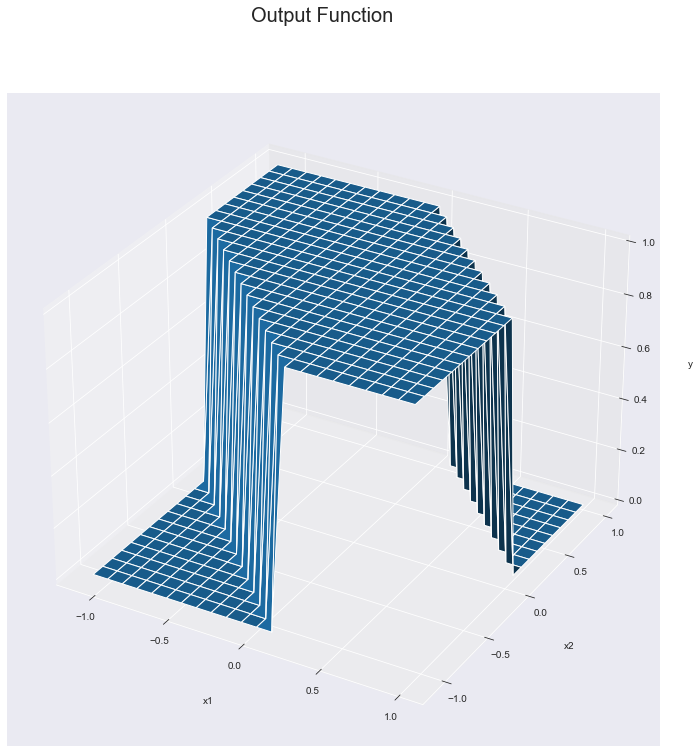

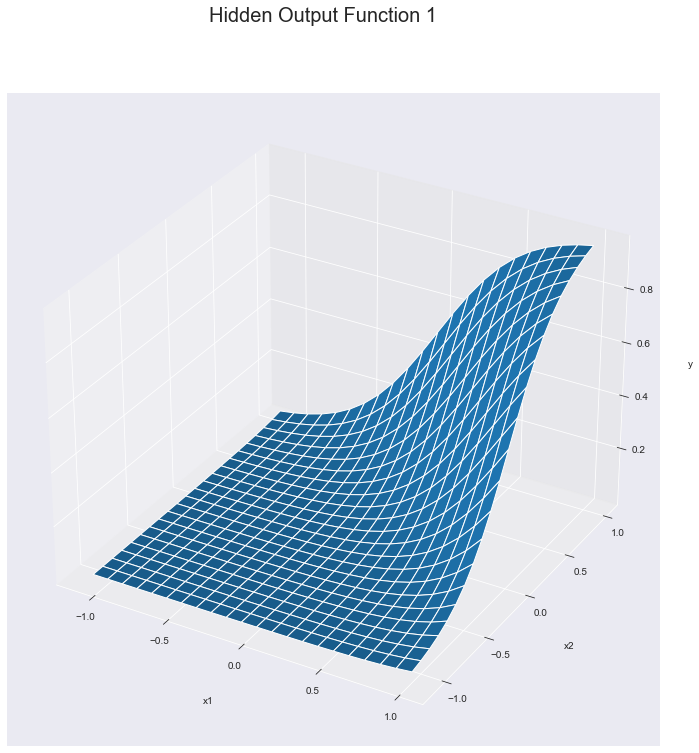

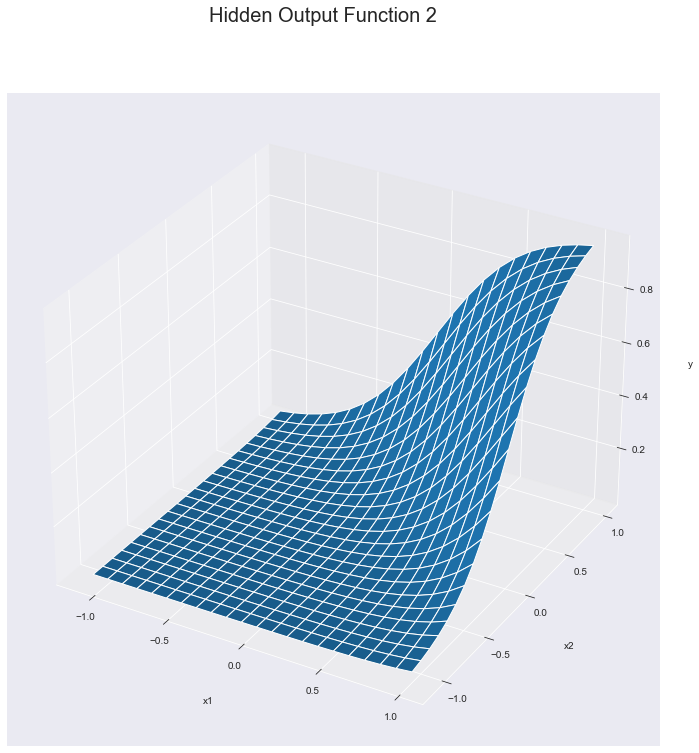

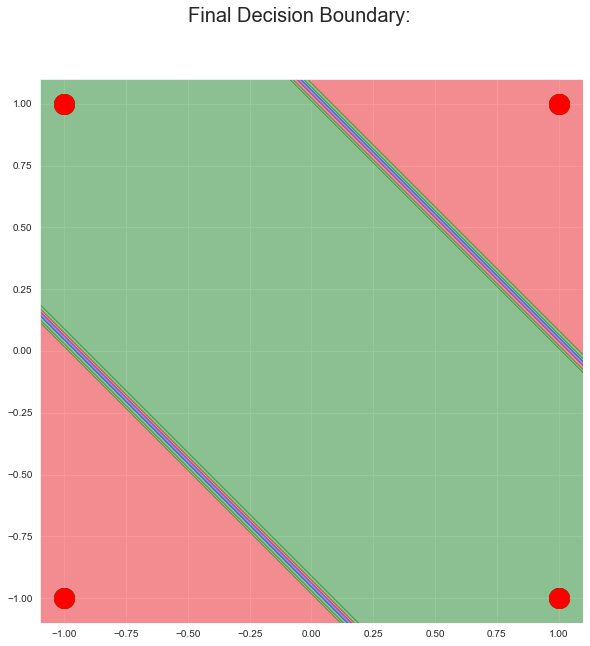

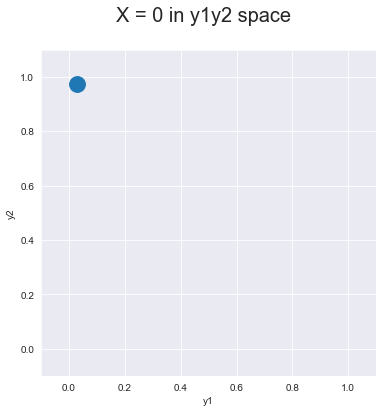

In [11]:
model = neural_net(inputs, target_outputs, 0.2, 10000)
model.showWeights()
model.plot()